In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from datetime import datetime
import joblib
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data4_population_updated.csv")


crime_weights = {"F": 4, "D": 2, "V": 1}
df["crime_weight"] = df["LAW_CAT_CD"].map(crime_weights)
crime_data = df.groupby("NTAName").agg({
    "crime_weight": "sum",       
    "Population": "first"   
}).reset_index()


In [3]:

crime_data = crime_data.dropna(subset=["Population"])  
crime_data = crime_data[crime_data["Population"] > 0]  


crime_data["weighted_crime_rate"] = (crime_data["crime_weight"] / crime_data["Population"]) * 10000


min_rate = crime_data["weighted_crime_rate"].min()
max_rate = crime_data["weighted_crime_rate"].max()
crime_data["normalized_weighted_rate"] = (crime_data["weighted_crime_rate"] - min_rate) / (max_rate - min_rate)


crime_data["safety_index"] = (1 - crime_data["normalized_weighted_rate"]) * 100
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None) 

print(crime_data[["NTAName", "weighted_crime_rate", "safety_index"]])
crime_data

                                                      NTAName  \
0                                                    Allerton   
4                                             Astoria Central   
5                                 Astoria East-Woodside North   
6                              Astoria North-Ditmars-Steinway   
7                                                Astoria Park   
8                                                  Auburndale   
9                                                Baisley Park   
11                                                 Bath Beach   
12                                                  Bay Ridge   
13                                      Bay Terrace-Clearview   
15                                               Bedford Park   
17                                    Bedford-Stuyvesant West   
18                                                  Bellerose   
19                                                    Belmont   
21                       

,NTAName,crime_weight,Population,weighted_crime_rate,normalized_weighted_rate,safety_index
0,Allerton,1259.0,28903.0,435.594921,0.067291,93.270874
4,Astoria Central,847.0,38894.0,217.771379,0.033642,96.635840
5,Astoria East-Woodside North,941.0,38894.0,241.939631,0.037375,96.262486
6,Astoria North-Ditmars-Steinway,3517.0,38894.0,904.252584,0.139690,86.030991
7,Astoria Park,20.0,38894.0,5.142181,0.000794,99.920563
8,Auburndale,504.0,20201.0,249.492599,0.038542,96.145806
9,Baisley Park,5278.0,36885.0,1430.933984,0.221053,77.894749
11,Bath Beach,3452.0,28572.0,1208.175836,0.186641,81.335945
12,Bay Ridge,4632.0,80539.0,575.125095,0.088846,91.115394
13,Bay Terrace-Clearview,88.0,20269.0,43.416054,0.006707,99.329303


In [4]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to fit the content
pd.set_option('display.max_colwidth', None)  # Show full column content

# Display the DataFrame
print(crime_data)

                                                      NTAName  crime_weight  \
0                                                    Allerton        1259.0   
4                                             Astoria Central         847.0   
5                                 Astoria East-Woodside North         941.0   
6                              Astoria North-Ditmars-Steinway        3517.0   
7                                                Astoria Park          20.0   
8                                                  Auburndale         504.0   
9                                                Baisley Park        5278.0   
11                                                 Bath Beach        3452.0   
12                                                  Bay Ridge        4632.0   
13                                      Bay Terrace-Clearview          88.0   
15                                               Bedford Park        2016.0   
17                                    Bedford-Stuyve

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in kilometers

In [6]:
print(crime_data[["NTAName", "weighted_crime_rate", "safety_index"]])

                                                      NTAName  \
0                                                    Allerton   
4                                             Astoria Central   
5                                 Astoria East-Woodside North   
6                              Astoria North-Ditmars-Steinway   
7                                                Astoria Park   
8                                                  Auburndale   
9                                                Baisley Park   
11                                                 Bath Beach   
12                                                  Bay Ridge   
13                                      Bay Terrace-Clearview   
15                                               Bedford Park   
17                                    Bedford-Stuyvesant West   
18                                                  Bellerose   
19                                                    Belmont   
21                       

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


X = crime_data.drop(columns=["safety_index", "NTAName"])  
y = crime_data["safety_index"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
def predict_safety(lat, lon, model, radius=0.4):

    df["distance"] = df.apply(lambda row: haversine(lat, lon, row["Latitude"], row["Longitude"]), axis=1)
    crimes_in_radius = df[df["distance"] <= radius]


    if crimes_in_radius.empty:
        return "Safe (No crimes found)"

   
    crime_weight = crimes_in_radius["crime_weight"].sum()
    population = crimes_in_radius["Population"].mean()

 
    weighted_crime_rate = (crime_weight / population) * 100000 if population > 0 else 0

   
    features = pd.DataFrame({
        "crime_weight": [crime_weight],
        "Population": [population],
        "weighted_crime_rate": [weighted_crime_rate],
        "normalized_weighted_rate": [(weighted_crime_rate - X_train["weighted_crime_rate"].min()) / 
                                     (X_train["weighted_crime_rate"].max() - X_train["weighted_crime_rate"].min())]
    })

    # Add missing columns (e.g., one-hot encoded neighborhoods) with default values
    for col in X_train.columns:
        if col not in features.columns:
            features[col] = 0  # Default to 0 for missing columns

    # Ensure the feature columns are in the same order as X_train
    features = features[X_train.columns]

    # Predict safety index
    safety_index = model.predict(features)[0]

    # Classify as safe or not safe based on a threshold
    threshold = 50  # Define your safety threshold
    if safety_index > threshold:
        return f"Safe (Safety Index: {safety_index:.2f})"
    else:
        return f"Not Safe (Safety Index: {safety_index:.2f})"

In [9]:
# Mid town manhattan
latitude = 40.75485647228779
longitude = -73.97384112322268


safety_status = predict_safety(latitude, longitude, model)
print(safety_status)

Not Safe (Safety Index: 39.37)


In [10]:

def get_top_crimes_in_area(lat, lon, radius=0.4, category_column='LAW_CAT_CD', crime_column='OFNS_DESC', top_n=3):
   
    df['distance'] = df.apply(lambda row: haversine(lat, lon, row['Latitude'], row['Longitude']), axis=1)
    

    crimes_in_radius = df[df['distance'] <= radius]
    

    crime_counts = crimes_in_radius.groupby([category_column, crime_column]).size().reset_index(name='count')
    
    crime_counts = crime_counts.sort_values(by=[category_column, 'count'], ascending=[True, False])
    
 
    top_crimes = crime_counts.groupby(category_column).head(top_n)
    
    return top_crimes



In [11]:

latitude = 40.75485647228779
longitude = -73.97384112322268
radius = 0.4  

top_crimes_in_area = get_top_crimes_in_area(latitude, longitude, radius)
print(top_crimes_in_area)

   LAW_CAT_CD                        OFNS_DESC  count
7           F                    GRAND LARCENY     79
4           F                   FELONY ASSAULT     43
14          F                          ROBBERY     36
33          M                    PETIT LARCENY     93
16          M     ASSAULT 3 & RELATED OFFENSES     74
30          M  OTHER OFFENSES RELATED TO THEFT     31
38          V                 OTHER STATE LAWS      3
37          V          MISCELLANEOUS PENAL LAW      1


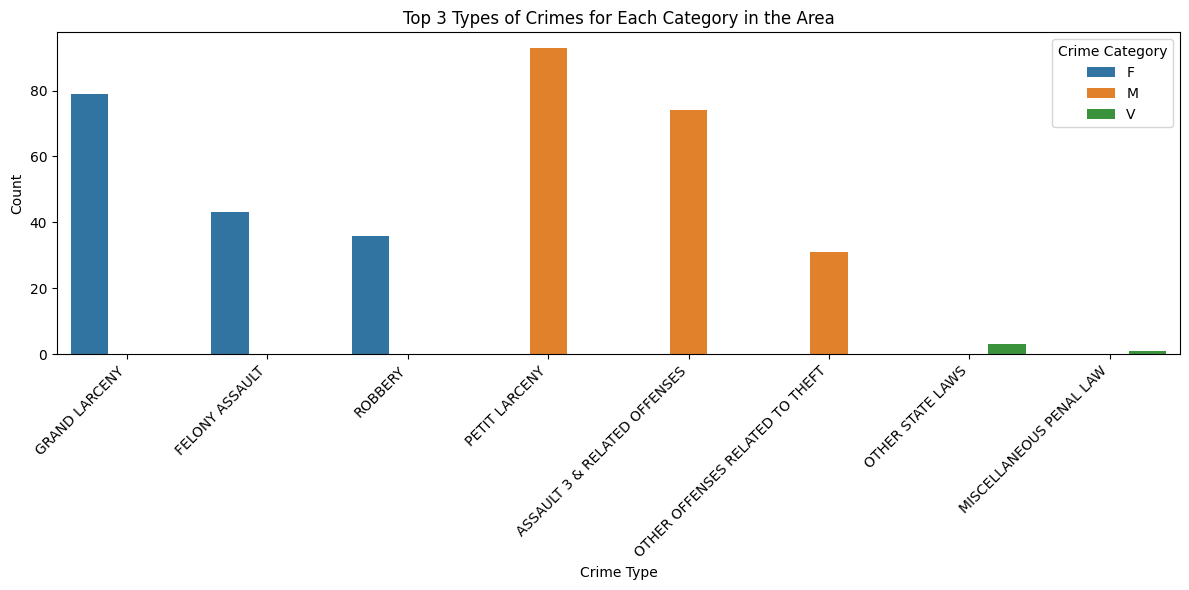

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_crimes_in_area,
    x='OFNS_DESC',
    y='count',
    hue='LAW_CAT_CD',
    dodge=True
)
plt.title('Top 3 Types of Crimes for Each Category in the Area')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Category')
plt.tight_layout()
plt.show()

In [ ]:
# To save model
# import joblib
# import pickle
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [ ]:
# To load the model

# # Using joblib
# loaded_model = joblib.load('random_forest_model.pkl')

# # Using pickle
# with open('random_forest_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)